### Rapport om iris
I denna rapport kommer längden av olika iris blad att analyseras

In [108]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy.stats as scs 
import seaborn as sns 
from scipy.stats import norm

filepath = "../Dataset/iris.csv"
iris = pd.read_csv(filepath)
iris = iris.dropna()
iris.columns = iris.columns.str.strip()
# Select only numeric columns
numeric_columns = iris.select_dtypes(include=[np.number])
# make a separate data-frame for length
length_data = iris[['sepal_length', 'petal_length']]



## Översikt av iris dataset


speal length μ = 5.843333, σ = 0.828066

petal length μ = 3.758667, σ = 1.764420

(width kommer inte att undersökas i denna rapporten)

In [109]:
length_description = length_data.describe()

# Visa resultatet
print(length_description)

       sepal_length  petal_length
count    150.000000    150.000000
mean       5.843333      3.758667
std        0.828066      1.764420
min        4.300000      1.000000
25%        5.100000      1.600000
50%        5.800000      4.350000
75%        6.400000      5.100000
max        7.900000      6.900000


## Kondifidentsintervall för sepal och petal length

In [52]:
confidence_level = 0.95
sepal_length_ci = scs.t.interval(
    confidence_level,
    len(numeric_columns['sepal_length']) - 1,
    loc=numeric_columns['sepal_length'].mean(),
    scale=numeric_columns['sepal_length'].std()
)
print(f"Confidence interval for sepal length: {sepal_length_ci}")

Confidence interval for sepal length: (4.207063752459323, 7.479602914207344)


In [29]:
confidence_level = 0.95
sepal_length_ci = scs.t.interval(
    confidence_level,
    len(numeric_columns['petal_length']) - 1,
    loc=numeric_columns['petal_length'].mean(),
    scale=numeric_columns['petal_length'].std()
)
print(f"Confidence interval for petal length: {sepal_length_ci}")

Confidence interval for petal length: (0.27214866587480646, 7.245184667458526)


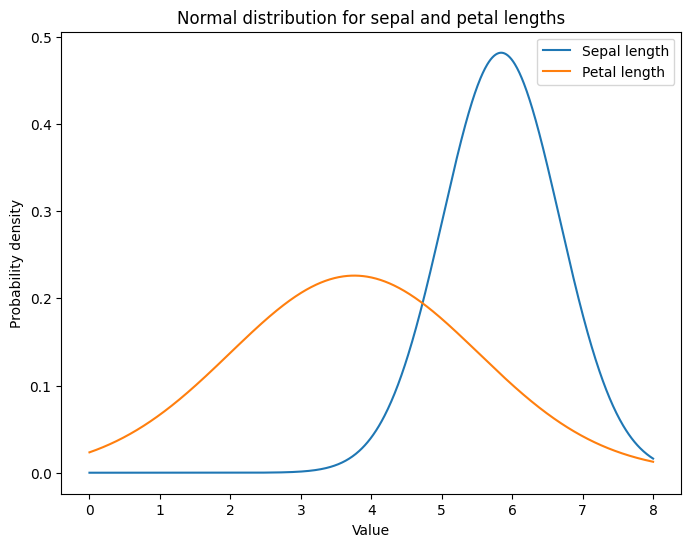

In [57]:
# Generate x values
x = np.linspace(0, 8, 1000)

# Generate normal distributions for sepal length and petal length ( mu = 5.843333, sigma = 0.828066 )
sepal_length_mean, sepal_length_std = 5.843333, 0.828066
sepal_length_pdf = norm.pdf(x, loc=sepal_length_mean, scale=sepal_length_std)

petal_length_mean, petal_length_std = 3.758667, 1.764420
petal_length_pdf = norm.pdf(x, loc=petal_length_mean, scale=petal_length_std)


fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x, sepal_length_pdf, label='Sepal length')
ax.plot(x, petal_length_pdf, label='Petal length')

plt.title('Normal distribution for sepal and petal lengths')
plt.xlabel('Value')
plt.ylabel('Probability density')
plt.legend()
plt.show()


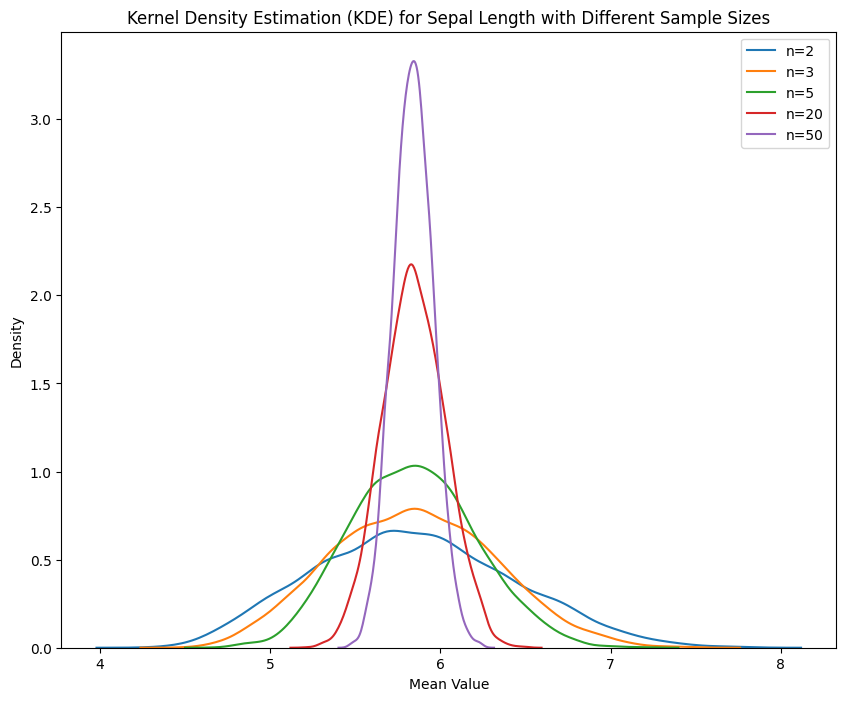

In [72]:

# 2
iter = 5000
means = np.zeros(iter)
n_list = [2, 3, 5, 20, 50]

# 3
fig, ax = plt.subplots(figsize=(10, 8))

# 4
for n in n_list:
    
    # 5
    for i in range(iter):
        # Randomly sample n values from sepal length of Iris dataset
        sampled_values = iris['sepal_length'].sample(n, replace=True)
        mean = sampled_values.mean()
        means[i] = mean
    
    # 6
    sns.kdeplot(means, label=f'n={n}', ax=ax)

# 7
ax.legend()
ax.set_title('Kernel Density Estimation (KDE) for Sepal Length with Different Sample Sizes')
ax.set_xlabel('Mean Value')
ax.set_ylabel('Density')
plt.show()


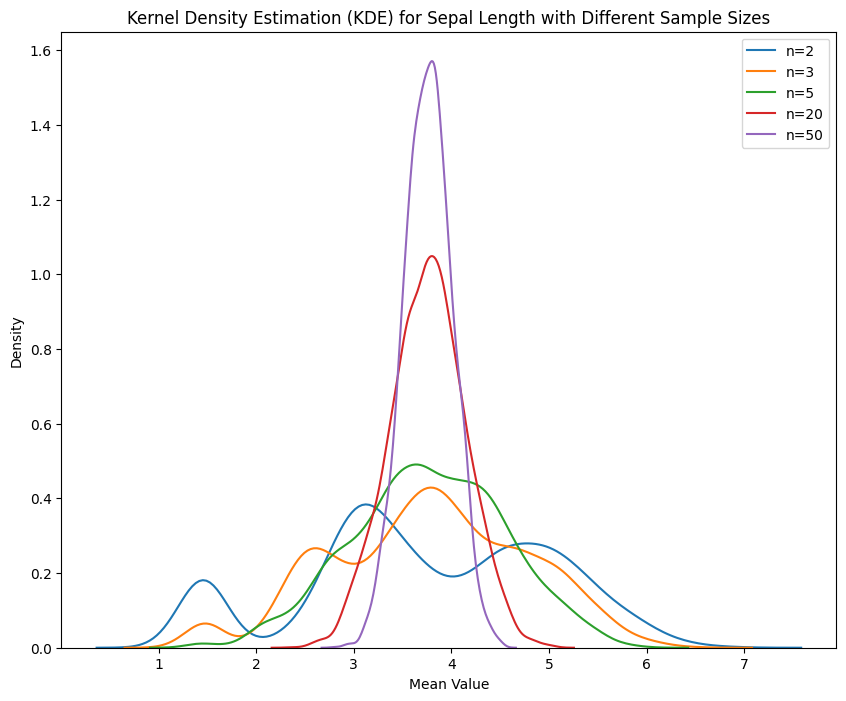

In [79]:

# 2
iter = 5000
means = np.zeros(iter)
n_list = [2, 3, 5, 20, 50]

# 3
fig, ax = plt.subplots(figsize=(10, 8))

# 4
for n in n_list:
    
    # 5
    for i in range(iter):
        # Randomly sample n values from sepal length of Iris dataset
        sampled_values = iris['petal_length'].sample(n, replace=True)
        mean = sampled_values.mean()
        means[i] = mean
    
    # 6
    sns.kdeplot(means, label=f'n={n}', ax=ax)

# 7
ax.legend()
ax.set_title('Kernel Density Estimation (KDE) for Sepal Length with Different Sample Sizes')
ax.set_xlabel('Mean Value')
ax.set_ylabel('Density')
plt.show()


Kollar specifik medalvärde (μ) för klassen iris-setosa

In [88]:
# Assuming 'iris' is your DataFrame with the Iris data
setosa = iris[iris['class'] == 'Iris-setosa']  # Subset data for 'Iris-setosa'
mean_sepal_length_setosa = setosa['sepal_length'].mean()  # Calculate mean sepal length for 'setosa'

print('Mean sepal length for Setosa:', mean_sepal_length_setosa)


Mean sepal length for Setosa: 5.006


## Hypotestest
Undersöker om iris setosa sepal lägnd siljer sig från de andra iris speal längd
medelvärde för hela populationen = 5.843333

Vi börjar med att bestämma alternativhypotesen som:<br>
    $H_A: \mu \neq 5.843333\,cm$<br>
Och sedan nollhypotesen som dess komplement:<br>
    $H_0: \mu = 5.843333\,cm$

Undersöknigen ska kolla om det stämmer överens med ett spcifik värde, vilket betyder att testet kommer göras dubbelsidig. 
Med hjälp av den inbyggda funktionen i scipy (ttest_1samp) kan vi få fram t-test, p-värde och med alternative='two sided' för att få en dubbelsidig test.

In [102]:
from scipy.stats import t


# Assuming 'iris' is your DataFrame with the Iris data
setosa = iris[iris['class'] == 'Iris-setosa']  # Subset data for 'Iris-setosa'
sample = setosa['sepal_length']  # Select the column 'sepal_length' as the sample.

xbar = sample.mean()  # Calculate sample mean
mu = 5.843333  # Set mu to the value for the null hypothesis
std = sample.std(ddof=1)  # Calculate the sample standard deviation
n = len(sample)  # Calculate the sample size

statistic = (xbar - mu) / (std / np.sqrt(n))  # Calculate the value of the test statistic
print('Test statistic:', statistic)  # Print the test statistic

p_value = 2 * (1 - t.cdf(x=np.abs(statistic), df=n - 1))  # Calculate the two-sided p-value
print('p-value:', p_value)  # Print the p-value


Test statistic: -16.797196170245318
p-value: 0.0


In [103]:

result = scs.ttest_1samp(a=sample, popmean=mu, alternative='two-sided') # Genomför två-sidigt t-test m.h.a. ttest_1samp() i SciPy 

print(result) # Printa resultatet


TtestResult(statistic=-16.797196170245318, pvalue=5.718267885122435e-22, df=49)


In [99]:
result = scs.ttest_1samp(a=sample, popmean=mu, alternative='greater') # Genomför ensidigt t-test.

print(result) # Printa resultatet

TtestResult(statistic=-16.797196170245318, pvalue=1.0, df=49)


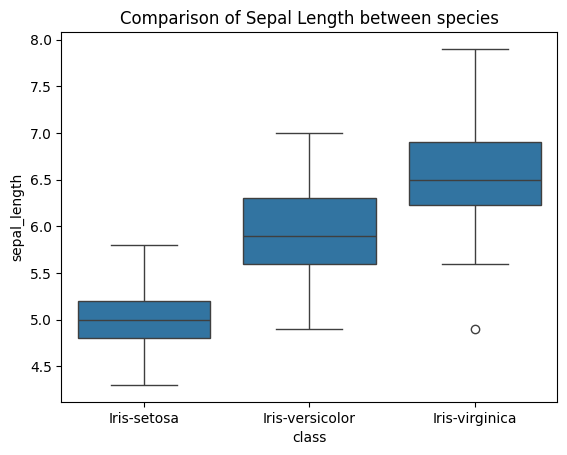

In [93]:

# Box plot for visual comparison
sns.boxplot(x='class', y='sepal_length', data=iris)
plt.title('Comparison of Sepal Length between species')
plt.show()

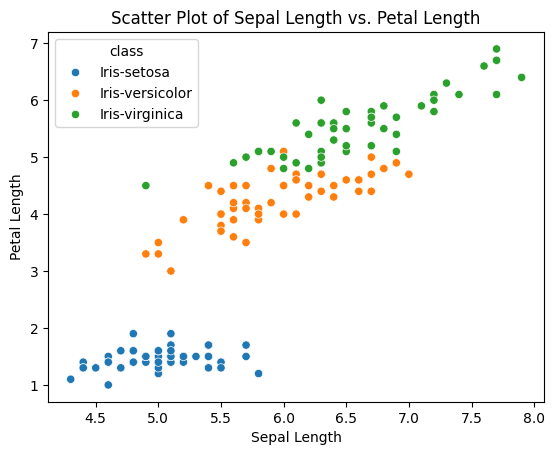

In [70]:
# 6. Data Visualization (Scatter Plot)
sns.scatterplot(x='sepal_length', y='petal_length', hue='class', data=iris)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Scatter Plot of Sepal Length vs. Petal Length')
plt.show()
 

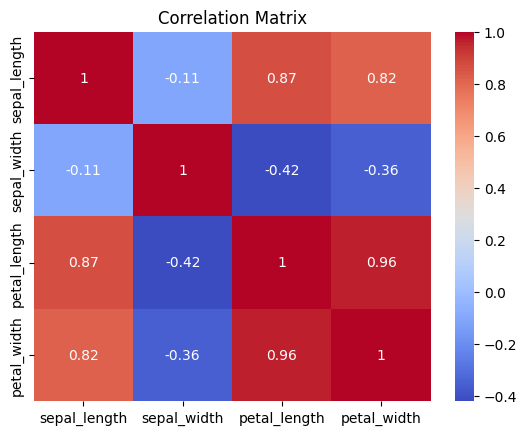

In [71]:
# 4. Correlation Analysis
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()